# 2. Manipulação e Análise de Dados com Python

o Utilize o Pandas para processar os dados extraídos e preparar resumos, como:

▪ Vendas totais por região e por produto

▪ Vendas totais por período de tempo (ano, mês)

o Crie filtros que permitam aos usuários selecionar intervalos de datas, produtos e
regiões.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

In [2]:
caminho = r'C:\Users\mau_a\OneDrive\Área de Trabalho\teste_da_1\consulta.txt'
df = pd.read_csv(caminho, sep = '	')

In [3]:
df.head()

,Data do Pedido,Valor Total,ShipToAddressID,Regiao,Produto
0,2011-05-31 00:00:00.000,"16158,6961",849,2,"Sport-100 Helmet, Red"
1,2011-05-31 00:00:00.000,"16158,6961",849,5,"Sport-100 Helmet, Red"
2,2011-05-31 00:00:00.000,"16158,6961",849,21,"Sport-100 Helmet, Red"
3,2011-05-31 00:00:00.000,"16158,6961",849,23,"Sport-100 Helmet, Red"
4,2011-05-31 00:00:00.000,"16158,6961",849,40,"Sport-100 Helmet, Red"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850858 entries, 0 to 1850857
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Data do Pedido   object
 1   Valor Total      object
 2   ShipToAddressID  int64 
 3   Regiao           int64 
 4   Produto          object
dtypes: int64(2), object(3)
memory usage: 70.6+ MB


In [5]:
# Substituindo vírgulas por pontos na coluna 'Valor Total'
df['Valor Total'] = df['Valor Total'].str.replace(',', '.', regex=False)

# Convertendo para int64
df['Valor Total'] = df['Valor Total'].astype('float')

In [6]:
# Agrupando e somando as vendas
vendas_totais = df.groupby(['Regiao', 'Produto']).agg({'Valor Total': 'sum'}).reset_index()

# Exibindo o resultado
print("\nVendas totais por região e produto:")

vendas_totais.head()


Vendas totais por região e produto:


,Regiao,Produto,Valor Total
0,1,AWC Logo Cap,9.032828e+06
1,1,All-Purpose Bike Stand,1.694025e+04
2,1,Bike Wash - Dissolver,2.801687e+06
3,1,Cable Lock,3.493324e+06
4,1,Chain,1.618345e+06


In [7]:
# Convertendo a coluna 'Data do Pedido' para o tipo datetime
df['Data do Pedido'] = pd.to_datetime(df['Data do Pedido'])

# Criando uma nova coluna com ano e mês apenas
df['ano_mes'] = df['Data do Pedido'].dt.to_period('M')

# Exibindo o DataFrame
df.head()


,Data do Pedido,Valor Total,ShipToAddressID,Regiao,Produto,ano_mes
0,2011-05-31,16158.6961,849,2,"Sport-100 Helmet, Red",2011-05
1,2011-05-31,16158.6961,849,5,"Sport-100 Helmet, Red",2011-05
2,2011-05-31,16158.6961,849,21,"Sport-100 Helmet, Red",2011-05
3,2011-05-31,16158.6961,849,23,"Sport-100 Helmet, Red",2011-05
4,2011-05-31,16158.6961,849,40,"Sport-100 Helmet, Red",2011-05


In [8]:
# Agrupando e somando as vendas
vendas_totais2 = df.groupby(['ano_mes']).agg({'Valor Total': 'sum'}).reset_index()

# Exibindo o resultado
print("\nVendas totais por data:")

vendas_totais2.head()


Vendas totais por data:


,ano_mes,Valor Total
0,2011-05,8.126920e+07
1,2011-06,7.525354e+06
2,2011-07,2.871903e+08
3,2011-08,3.889651e+08
4,2011-09,5.092825e+06


In [9]:
def filtrar_dados(df, data_inicio, data_fim, produtos, regioes):
    # Filtrando por intervalo de datas
    mask_data = (df['ano_mes'] >= data_inicio) & (df['ano_mes'] <= data_fim)
    
    # Filtrando por produtos e regiões
    mask_produto = df['Produto'].isin(produtos)
    mask_regiao = df['Regiao'].isin(regioes)
    
    # Aplicando todos os filtros
    df_filtrado = df[mask_data & mask_produto & mask_regiao]
    
    return df_filtrado

In [10]:
# Definindo os parâmetros de filtro (EXEMPLO)
data_inicio = '2011-01'
data_fim = '2021-01'
produtos = ['Sport-100 Helmet, Red']
regioes = [2,3,4]

# Filtrando os dados
df_filtrado = filtrar_dados(df, data_inicio, data_fim, produtos, regioes)

# Exibindo o resultado
df_filtrado

,Data do Pedido,Valor Total,ShipToAddressID,Regiao,Produto,ano_mes
0,2011-05-31,16158.6961,849,2,"Sport-100 Helmet, Red",2011-05
60,2011-05-31,15524.0686,955,3,"Sport-100 Helmet, Red",2011-05
72,2011-05-31,48204.0662,889,2,"Sport-100 Helmet, Red",2011-05
87,2011-05-31,23126.4500,807,3,"Sport-100 Helmet, Red",2011-05
99,2011-05-31,23242.1865,943,3,"Sport-100 Helmet, Red",2011-05
...,...,...,...,...,...,...
50129,2014-06-19,77.3169,25463,2,"Sport-100 Helmet, Red",2014-06
50139,2014-06-19,82.8529,17861,2,"Sport-100 Helmet, Red",2014-06
50217,2014-06-24,109.3508,20935,2,"Sport-100 Helmet, Red",2014-06
50323,2014-06-25,140.2798,25551,2,"Sport-100 Helmet, Red",2014-06


# 3. Criação de Visualizações com Plotly ou Matplotlib

o Crie ao menos duas visualizações:

▪ Um gráfico de barras mostrando as vendas por produto.

▪ Um gráfico de linhas mostrando as vendas ao longo do tempo.

In [11]:
# Agrupando e somando as vendas por produto
vendas_por_produto = df.groupby('Produto')['Valor Total'].sum().reset_index()

# Ordenando por mais vendido
vendas_por_produto = vendas_por_produto.sort_values(by='Valor Total', ascending=False)

# Selecionando os top 10 para apresentar no gráfico
vendas_por_produto = vendas_por_produto.head(10)

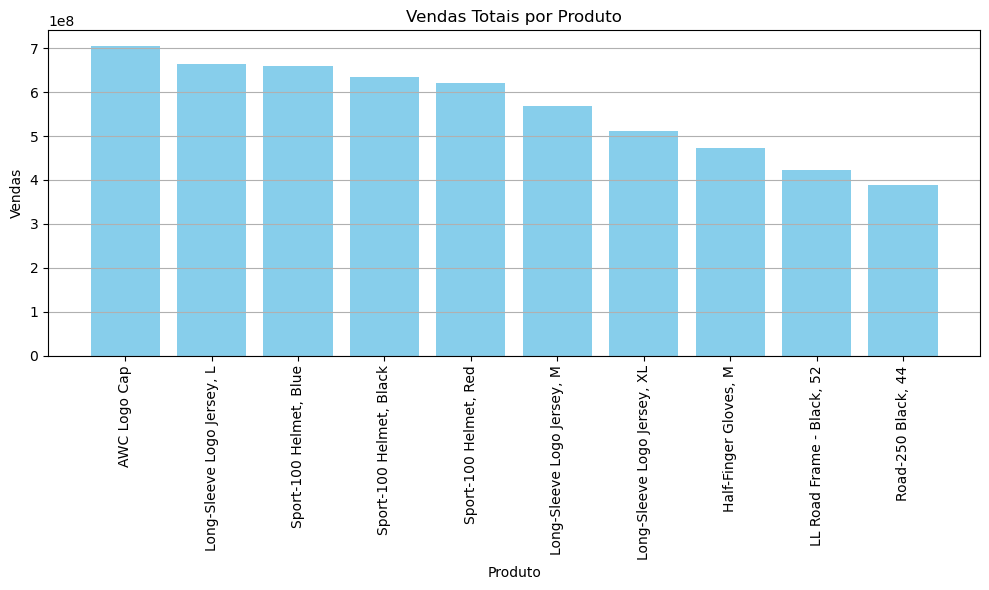

In [12]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(vendas_por_produto['Produto'], vendas_por_produto['Valor Total'], color='skyblue')
plt.title('Vendas Totais por Produto')
plt.xlabel('Produto')
plt.ylabel('Vendas')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [15]:
# Agrupando e somando as vendas por data
vendas_por_data = df.groupby('Data do Pedido')['Valor Total'].sum().reset_index()
vendas_por_data.sort_values(by='Valor Total', ascending=False)

,Data do Pedido,Valor Total
758,2013-06-30,5.040445e+09
850,2013-09-30,3.577397e+09
1032,2014-03-31,3.296397e+09
393,2012-06-30,3.048899e+09
789,2013-07-31,2.378542e+09
...,...,...
79,2011-08-20,2.372393e+04
363,2012-05-31,2.065672e+04
499,2012-10-14,1.847052e+04
87,2011-08-28,9.361514e+03


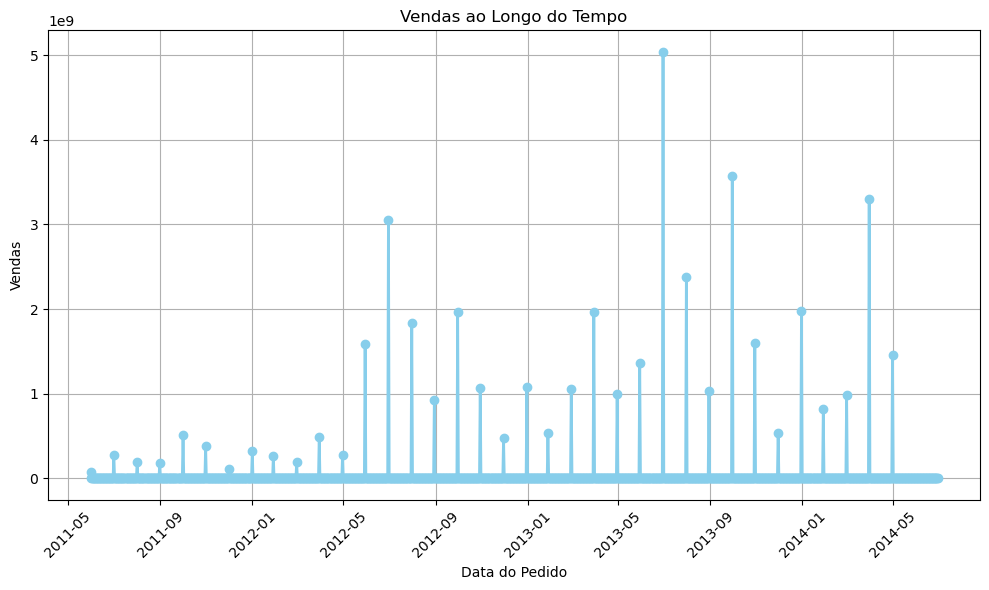

In [16]:
# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(vendas_por_data['Data do Pedido'], vendas_por_data['Valor Total'], marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data do Pedido')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.grid()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# 4. Construção do Dashboard com Streamlit

o Desenvolva o painel no Streamlit, exibindo as visualizações e filtros criados.

o Mostre um KPI com o total de vendas no período filtrado.

# Não foi feito :/